In [3]:
pip install keras

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/b8/88def36e74bee9fce511c9519571f4e485e890093ab7442284f4ffaef60b/google_auth_oauthlib-0.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/e5/38518af393f7c214357079ce67a317307936896e961e35450b70fad2a9cf/rsa-4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/1e/a94a8d635fa3ce4cfc7f506003548d0a2447ae76fd5ca53932970fe3053f/pyasn1-0.4.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.o

In [3]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


In [4]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [5]:
# Summarize number of classes; binary classification problem for good or bad sentiment
#in movie review
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [6]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


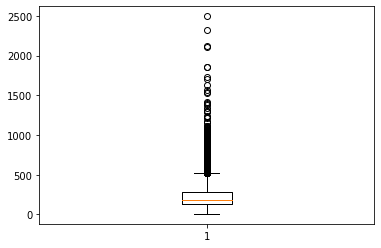

In [7]:
# Summarize review length.Looking a box and whisker plot for the review lengths 
#in words, we can probably see an exponential distribution that 
#we can probably cover the mass of the distribution with a 
#clipped length of 400 to 500 words.
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [8]:
imdb.load_data(nb_words=5000)

C:\Users\rothg\Anaconda3\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4

In [16]:
from keras.preprocessing.sequence import sequence
from keras.layers.embeddings import Embedding


In [17]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [18]:
Embedding(5000, 32, input_length=500)

In [19]:
#Simple Multi-Layer Perceptron Model for the IMDB Dataset
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [20]:
# load the dataset but only keep the top n words, zero the rest; 50/50 split, good standard
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [21]:
#bound reviews at 500 words, truncating longer reviews and zero-padding shorter reviews
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [22]:
# create the model, Embedding layer as input layer setting vocabulary to 5000,
#word vector to 32 dimensions and input length to 500. Output is 32 x 500.
#We will flatten the Embedded layers output to one dimension, then use 
#one dense hidden layer of 250 units with a rectifier activation function. 
#The output layer has one neuron and will use a sigmoid activation to 
#output values of 0 and 1 as predictions.The model uses logarithmic loss 
#and is optimized using the efficient ADAM optimization procedure

The model uses logarithmic loss and is optimized using the efficient ADAM optimization procedure.
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
#We can fit the model and use the test set as validation while training. 
#This model overfits very quickly so we will use very few training epochs, 
#in this case just 2.There is a lot of data so we will use a batch size of 128. 
#After the model is trained, we evaluate its accuracy on the test dataset.
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

C:\Users\rothg\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 14s - loss: 0.4855 - accuracy: 0.7407 - val_loss: 0.2896 - val_accuracy: 0.8770
Epoch 2/2
 - 13s - loss: 0.1851 - accuracy: 0.9287 - val_loss: 0.3037 - val_accuracy: 0.8764
Accuracy: 87.64%


In [24]:
#One Dimensional CNN for IMBD dataset
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [25]:
#Prepping the data as previously in MLP above
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [26]:
# create the model, This time, after the Embedding input layer, we insert a Conv1D layer. 
#This convolutional layer has 32 feature maps and 
#reads embedded word representations 3 vector elements of the word embedding at a time.
#The convolutional layer is followed by a 1D max pooling layer with a length 
#and stride of 2 that halves the size of the feature maps 
#from the convolutional layer. The rest of the network is the same 
#as the neural network above
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [27]:
# Fit the model as before
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

C:\Users\rothg\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 17s - loss: 0.4446 - accuracy: 0.7664 - val_loss: 0.2733 - val_accuracy: 0.8868
Epoch 2/2
 - 16s - loss: 0.2108 - accuracy: 0.9177 - val_loss: 0.2690 - val_accuracy: 0.8869
Accuracy: 88.69%
